## SVM using DummyData

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y = [0,0,0,0,1,1,1,1,1,1,1,1,1]

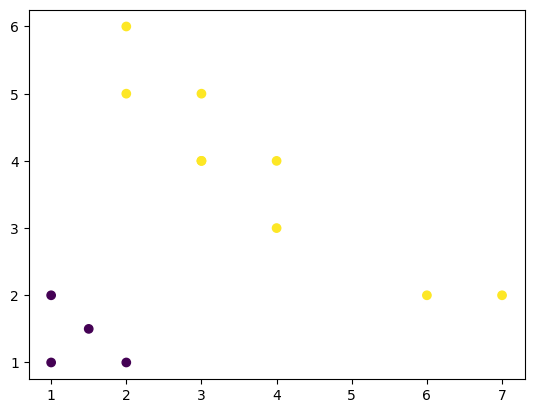

In [3]:
X_x1 = X[:,0]
X_x2 = X[:,1]
plt.scatter(X_x1, X_x2, c = y)
plt.show()

In [4]:
svcLinear =  SVC(kernel='linear', C=1).fit(X, y)
svcLinear.coef_, svcLinear.intercept_

(array([[0.49989823, 0.49989823]]), array([-2.49953185]))

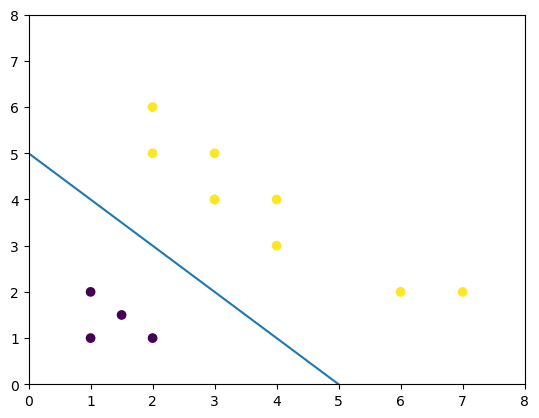

In [5]:
x1 = np.array([0, 5])
x2 = -1 *(svcLinear.intercept_ + svcLinear.coef_[0][0] * x1)/svcLinear.coef_[0][1]
plt.plot(x1, x2)
plt.scatter(X_x1, X_x2, c = y)
plt.axis([0, 8, 0, 8])
plt.show()

In [6]:
# Now lets change class of one point in purple one

In [7]:
X = np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y = [0,1,0,0,1,1,1,1,1,1,1,1,1]

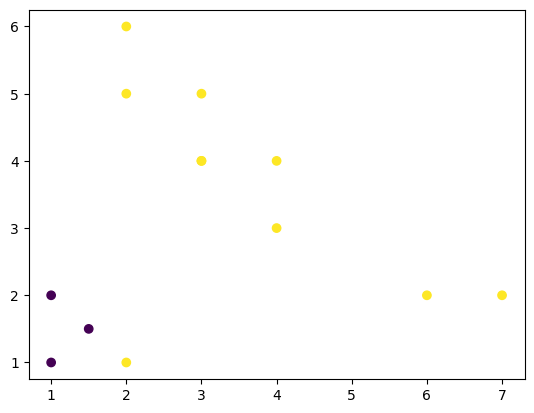

In [8]:
X_x1 = X[:,0]
X_x2 = X[:,1]
plt.scatter(X_x1, X_x2, c = y)
plt.show()

In [9]:
svcLinear =  SVC(kernel='linear', C=1).fit(X, y)
svcLinear.coef_, svcLinear.intercept_

(array([[0.8, 0.4]]), array([-2.6]))

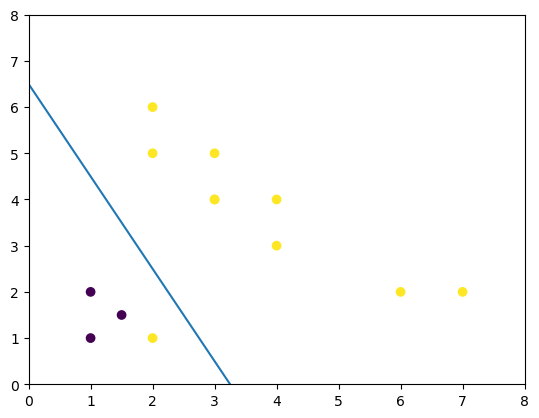

In [10]:
x1 = np.array([0, 5])
x2 = -1 *(svcLinear.intercept_ + svcLinear.coef_[0][0] * x1)/svcLinear.coef_[0][1]
plt.plot(x1, x2)
plt.scatter(X_x1, X_x2, c = y)
plt.axis([0, 8, 0, 8])
plt.show()

In [11]:
#Now increasing value of c

In [12]:
svcLinear =  SVC(kernel='linear', C=10000).fit(X, y)
svcLinear.coef_, svcLinear.intercept_

(array([[3.99804688e+00, 4.44089210e-16]]), array([-6.99633789]))

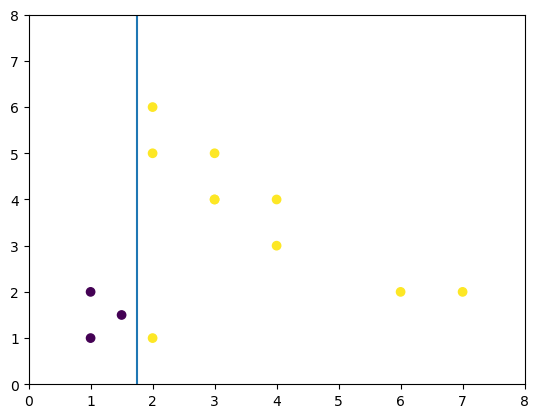

In [13]:
x1 = np.array([0, 5])
x2 = -1 *(svcLinear.intercept_ + svcLinear.coef_[0][0] * x1)/svcLinear.coef_[0][1]
plt.plot(x1, x2)
plt.scatter(X_x1, X_x2, c = y)
plt.axis([0, 8, 0, 8])
plt.show()

# sklearn SVM on iris

In [14]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
iris = datasets.load_iris()
x = iris.data[:, 0:2]
y=iris.target
x.shape,y.shape

((150, 2), (150,))

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [17]:
clf = svm.SVC(kernel="linear")
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [18]:
# Get all the arguments of SVC classifier
params = clf.get_params()

# Print all the arguments
for param, value in params.items():
    print(param, ":", value)

C : 1.0
break_ties : False
cache_size : 200
class_weight : None
coef0 : 0.0
decision_function_shape : ovr
degree : 3
gamma : scale
kernel : linear
max_iter : -1
probability : False
random_state : None
shrinking : True
tol : 0.001
verbose : False


In [19]:
# C: higher the C we will more focusing on not making training errors
# and not worried about regularization
# if C is very hig then overfitting
# if C is very low then underfitting

# class_weight: if we want to give some bias to a particular class
# none means all classes have equal weightage

# coef0: not used in case of rbf and linear, used in case of polynomial

# gamma is 1/(2*sigma^2) if gamma is too low then underfitting
# if gamma is too high then overfitting

In [20]:
clf.score(x_test,y_test)

0.8157894736842105

In [21]:
def makegrid(x1, x2, h = 0.02):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    a = np.arange(x1_min,x1_max,h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a, b)
    return xx, yy

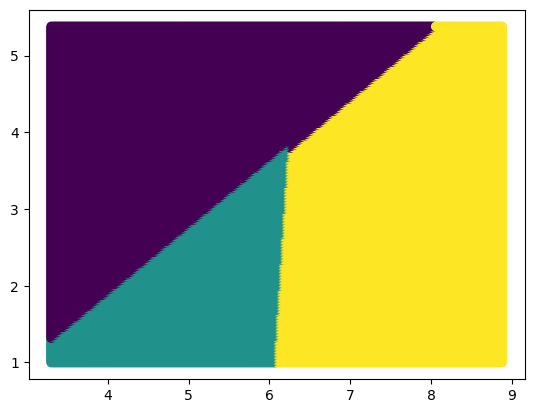

In [22]:
xx, yy = makegrid(x[:, 0], x[:, 1])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()

## Choosing parameters using grid search

In [23]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [24]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [25]:
x_train,x_test, y_train, y_test = train_test_split(x, y)

In [26]:
clf = KNeighborsClassifier()
grid = {"n_neighbors":[3,5,7,9,11]}
abc = GridSearchCV(clf, grid)
abc.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [27]:
abc.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [28]:
clf = svm.SVC()
grid = {'C' : [1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
       'gamma' : [1e-3, 5e-4, 1e-4, 5e-3]}
abc = GridSearchCV(clf, grid)
abc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100.0, 1000.0, 5000.0, 10000.0, 50000.0,
                               100000.0],
                         'gamma': [0.001, 0.0005, 0.0001, 0.005]})

In [29]:
abc.best_estimator_

SVC(C=100.0, gamma=0.005)

# using support vectors to Regression

In [30]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
x = housing.data
y = housing.target

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
clf = svm.SVR(kernel = "rbf")
clf.fit(x_train,y_train)

In [ ]:
# Get all the arguments of SVC classifier
params = clf.get_params()

# Print all the arguments
for param, value in params.items():
    print(param, ":", value)

In [ ]:
clf.score(x_test,y_test)

In [ ]:
clf = svm.SVR(kernel = "linear")
clf.fit(x_train,y_train)

# using support vectors to Regression on boston dataset

In [31]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [32]:
X=data
Y=target
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0)

In [33]:
clf = svm.SVR(kernel = "rbf")
clf.fit(x_train,y_train)

SVR()

In [34]:
# Get all the arguments of SVC classifier
params = clf.get_params()

# Print all the arguments
for param, value in params.items():
    print(param, ":", value)

C : 1.0
cache_size : 200
coef0 : 0.0
degree : 3
epsilon : 0.1
gamma : scale
kernel : rbf
max_iter : -1
shrinking : True
tol : 0.001
verbose : False


In [35]:
clf.score(x_test,y_test)

0.08369460247143279

In [36]:
clf=svm.SVR(kernel="linear")
clf.fit(x_train,y_train)

SVR(kernel='linear')

In [37]:
clf.score(x_test,y_test)

0.5635500167528924

In [38]:
clf = svm.SVR()
grid = {'C': [1e2,1e3, 5e3, 1e4, 5e4, 1e5],
       'gamma': [1e-3, 5e-4, 1e-4, 5e-3]}
abc = GridSearchCV(clf, grid)
abc.fit(x_train, y_train)
abc.best_estimator_

SVR(C=1000.0, gamma=0.0001)

In [39]:
abc.score(x_test,y_test)

0.6022138976857652